In [1]:
#ピックルを呼び起こす
import pickle
import pandas as pd
from sklearn.cluster import KMeans
# ファイルから保存された変数を読み込む
with open('pca_results.pkl', 'rb') as f:
    pca_components, explained_variance_ratio = pickle.load(f)
    
    
reduced_cross_tab_df = pd.read_csv('PC_result.csv')
df = pd.read_csv('cluster_results.csv')
# 読み込んだ変数を利用する
# 例: 主成分分析の結果を表示する
print(pca_components)
print(explained_variance_ratio)

[[-5.52886687e-05 -2.01268731e-05 -3.34020718e-06 ...  1.27086665e-07
  -5.74281992e-07  1.52262537e-07]
 [ 2.10942587e-04  2.81266866e-04 -1.00338576e-05 ... -5.37159542e-07
  -2.19252480e-06 -1.43216985e-06]
 [-9.19450625e-04 -3.71213194e-04 -2.09306719e-05 ...  2.37608841e-06
  -2.61256675e-06 -9.41769505e-06]]
[0.01881811 0.00668132 0.00461701]


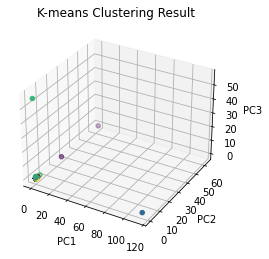

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# ファイルから保存された変数を読み込む
with open('pca_results.pkl', 'rb') as f:
    pca_components, explained_variance_ratio = pickle.load(f)

reduced_cross_tab_df = pd.read_csv('PC_result.csv')

# クラスタリングを実行
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(reduced_cross_tab_df)

# クラスタリング結果のラベルを取得
labels = kmeans.labels_

# 3次元散布図を作成
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# クラスタリング結果を可視化
ax.scatter(reduced_cross_tab_df['PC1'], reduced_cross_tab_df['PC2'], reduced_cross_tab_df['PC3'], c=labels)

# 軸ラベルの設定
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# グラフのタイトル設定
ax.set_title('K-means Clustering Result')

# グラフの表示
plt.show()

# 画像データとして保存
#fig.savefig('図の保存先のファイルパス.png')

In [4]:
fig = plt.figure()
fig.savefig("img.png")

<Figure size 432x288 with 0 Axes>

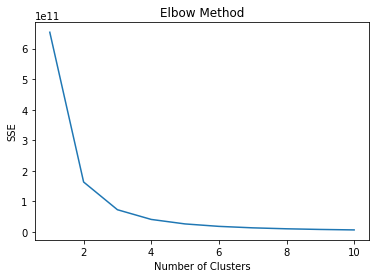

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = reduced_cross_tab_df

# SSEの値を保持するリスト
sse = []

# クラスタ数の範囲
k_range = range(1, 11)

# 各クラスタ数でK-meansクラスタリングを実行し、SSEを計算
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# SSEの値をプロット
plt.plot(k_range, sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()


In [7]:
#ここからは、作成したPCAを、CSVにし、snowflakeに取り込んできます。
print(reduced_cross_tab_df)

       Unnamed: 0       PC1       PC2       PC3
0               0 -0.007210 -0.010410 -0.000859
1               1 -0.007162 -0.010868  0.000128
2               2 -0.007276 -0.011554 -0.002772
3               3 -0.007259 -0.010888 -0.008963
4               4 -0.007285 -0.010321 -0.013099
...           ...       ...       ...       ...
19863       19863 -0.007148 -0.010830  0.000307
19864       19864 -0.007237 -0.009382 -0.002748
19865       19865 -0.007105 -0.010888 -0.001172
19866       19866 -0.007147 -0.010828  0.000366
19867       19867 -0.007417 -0.010549 -0.004886

[19868 rows x 4 columns]
